In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

import cv2
from glob import glob

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

from keras import optimizers
from keras.utils.np_utils import to_categorical
from keras.preprocessing import image

from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg

print("Libraries updated")


Using TensorFlow backend.


Libraries updated


In [2]:

# Set some standard parameters upfront
pd.options.display.float_format = '{:.2f}'.format
sns.set() # Default seaborn look and feel
plt.style.use('ggplot')
print('pandas version ', pd.__version__ , '\n' )


data_dir = './LabelledRice'
images = glob(os.path.join(data_dir, '*/*.jpg'))
total_images = len(images)
print('Total images:', total_images, '\n' )

# number of images per class
image_count = []
class_names = []

for folder in os.listdir(os.path.join(data_dir)):
    folder_num = len(os.listdir(os.path.join(data_dir, folder)))
    image_count.append(folder_num)
    class_names.append(folder)
    print('{:20s}'.format(folder), end=' ')
    print(folder_num)
    
    

pandas version  0.25.1 

Total images: 2826 

0BrownSpot           523
1Healthy             959
2Hispa               565
3LeafBlast           779


In [3]:

X_Feat = list()
Y_Label = list()
IMG_SIZE = 128

for i in os.listdir("./labelledrice/0BrownSpot"):
    try:
        path = "./labelledrice/0BrownSpot/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        X_Feat.append(img)
        Y_Label.append(0)
    except:
        None
print("Image set 0 - BrownSpot updated")

for i in os.listdir("./labelledrice/1Healthy"):
    try:
        path = "./labelledrice/1Healthy/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        X_Feat.append(img)
        Y_Label.append(1)
    except:
        None
print("Image set 1 - Healthy updated")

for i in os.listdir("./labelledrice/2Hispa"):
    try:
        path = "./labelledrice/2Hispa/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        X_Feat.append(img)
        Y_Label.append(2)
    except:
        None
print("Image set 2 - Hispa updated")
        
for i in os.listdir("./LabelledRice/3LeafBlast"):
    try:
        path = "./labelledrice/3LeafBlast/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        X_Feat.append(img)
        Y_Label.append(3)
    except:
        None
print("Image set 3 - LeafBlast updated")
        
    

Image set 0 - BrownSpot updated
Image set 1 - Healthy updated
Image set 2 - Hispa updated
Image set 3 - LeafBlast updated


In [1]:
X_Feat = np.array(X_Feat)
plt.figure(figsize = (20,20))
for i in range(4):
    img = X_Feat[700*i]
    plt.subplot(1,4,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(class_names[i])

plt.savefig('Sample Images with Label')
plt.show()


NameError: name 'np' is not defined

In [5]:
Y_Label = to_categorical(Y_Label, num_classes = 4)

x_train,x_test,y_train,y_test = train_test_split(X_Feat,Y_Label,test_size = 0.15,random_state = 42)
print("X_train shape: " + str(x_train.shape))
#print("Y_train shape: " + y_train.shape)
print("X_test shape: " + str(x_test.shape))
#print("Y_test shape: " + str(y_test.shape))


X_train shape: (2402, 128, 128, 3)
X_test shape: (424, 128, 128, 3)


In [6]:
print( "CNN Model Build")
model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3,3),padding="Same",activation="relu" , input_shape = (IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
# 2nd Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
# 3rd Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
# 4th Convolutional Layer
model.add(Conv2D(filters=256,kernel_size = (3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
# 5th Convolutional Layer
model.add(Conv2D(filters=512,kernel_size = (3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())
# Add output layer
model.add(Dense(4,activation="softmax"))

print("Model Summary")
model.summary() # print summary my model
print("Model Compile")
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001),metrics=['accuracy']) #optimizer='adam'



CNN Model Build
Model Summary
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
batch_normalization_2 (B

In [7]:
epoch = 5
batch_size = 10

print( "Start Training", '\n' )

model.fit( x_train,y_train,batch_size=batch_size,epochs= epoch )

print( "Training End", '\n' )



Start Training 

Epoch 1/5
2402/2402 [==============================] - 175s 73ms/step - loss: 1.5768 - accuracy: 0.4038
Epoch 2/5
2402/2402 [==============================] - 164s 68ms/step - loss: 1.3519 - accuracy: 0.4334
Epoch 3/5
2402/2402 [==============================] - 166s 69ms/step - loss: 1.3615 - accuracy: 0.3918
Epoch 4/5
2402/2402 [==============================] - 166s 69ms/step - loss: 1.2789 - accuracy: 0.4392
Epoch 5/5
2402/2402 [==============================] - 163s 68ms/step - loss: 1.1998 - accuracy: 0.4684
Training End 



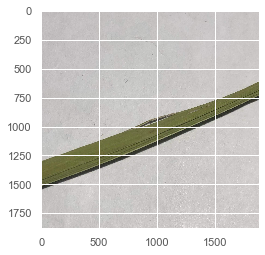

[[0.6473088  0.02208483 0.01087873 0.31972754]]
0
BrownSpot


In [8]:
img = mpimg.imread('LabelledRice/1Healthy/IMG_2996.jpg')
imgplot = plt.imshow(img)
plt.show()
test_image = image.load_img('LabelledRice/1Healthy/IMG_2996.jpg', target_size = (128, 128))
#input1 = cv2.imread('LabelledRice/Healthy/IMG_2996.jpg')
#cv2.imshow('Input - ', input1)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print (result)
class_idx = np.argmax(result)
print (class_idx)
PredictValue = class_idx

if( PredictValue == 0 ):
    print("BrownSpot")
elif( PredictValue == 1 ):
    print("Healthy")
elif( PredictValue == 2 ):
    print("Hispa")
elif( PredictValue == 3 ):
    print("LeafBlast")


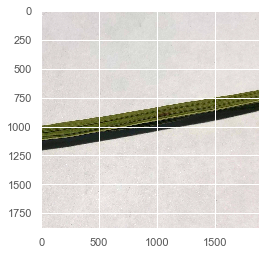

[[0.9337497  0.0069141  0.00476144 0.05457481]]
0
BrownSpot


In [9]:
img = mpimg.imread('LabelledRice/0BrownSpot/IMG_2993.jpg')
imgplot = plt.imshow(img)
plt.show()
test_image = image.load_img('LabelledRice/0BrownSpot/IMG_2993.jpg', target_size = (128, 128))
#input1 = cv2.imread('LabelledRice/Healthy/IMG_2996.jpg')
#cv2.imshow('Input - ', input1)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print (result)
class_idx = np.argmax(result)
print (class_idx)
PredictValue = class_idx

if( PredictValue == 0 ):
    print("BrownSpot")
elif( PredictValue == 1 ):
    print("Healthy")
elif( PredictValue == 2 ):
    print("Hispa")
elif( PredictValue == 3 ):
    print("LeafBlast")
